In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [172]:
import metric_learn

In [173]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


### Explore the shape and data included in the spectra files on an example

In [174]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data.head()

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [175]:
data.shape

(362, 1203)

In [176]:
# here we adjust the df's row and column indexes 
data_df = data.rename(columns ={'Run Time':'Time'}, inplace = True)
data_df = data.drop('Name', 1)
data_df.set_index('Time', inplace = True)
data_df.columns.name = 'Wavelength'

data_df.head()

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [177]:
data_np = data_df.values
data_np

array([[  753,   742,   733, ...,   872,  1080,  1081],
       [  957,   926,   898, ...,  1228,  1758,  1747],
       [ 1065,  1024,   985, ...,  1227,  1733,  1718],
       ..., 
       [65534, 62736, 51964, ..., 11869, 23117, 22547],
       [65534, 62725, 51960, ..., 11845, 23121, 22533],
       [65534, 62684, 51903, ..., 11839, 23112, 22546]], dtype=int64)

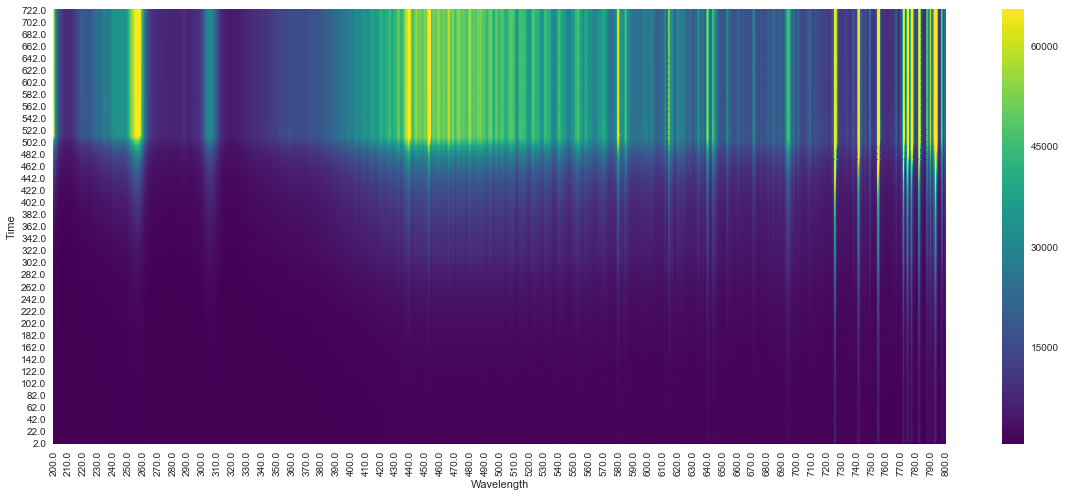

In [178]:
#create seaborn heatmap of data
sns.set_context(rc={"figure.figsize": (20,8)})                                   #increase figure size
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                #invert Y axis 


### Not a great resolution in the heatmap.  Range of intensity scales from hundreds to >60k.  Let's do a log rescale to see  if the data looks better.


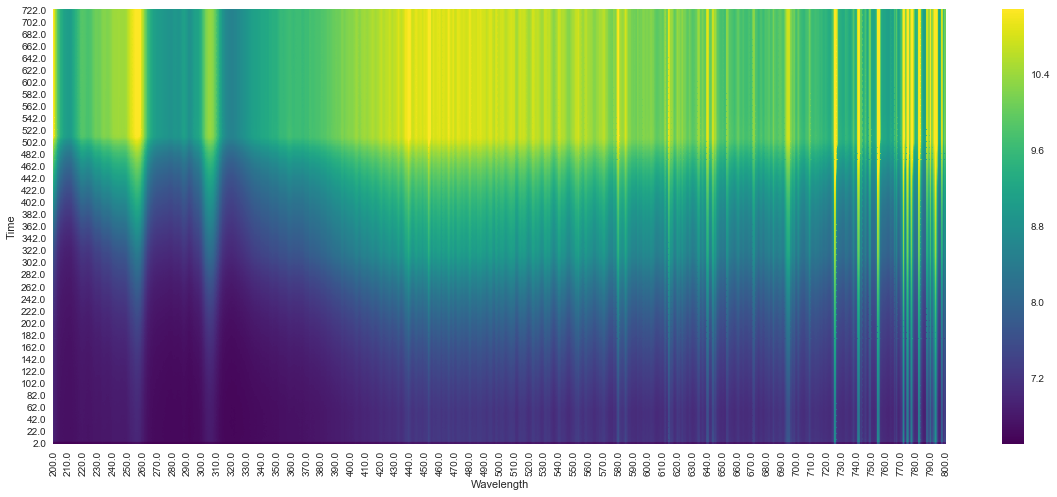

In [179]:
#log scale of data for our heatmap  

ax = sns.heatmap(log(data_df), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

In [180]:
#look at the range of data for each column.  What is the max and min range of the columns in the dataset.
range_df = data_df.max() - data_df.min()
print(range_df.max())
print(range_df.min())
#range_df

64781
4539


In [181]:
#scaling the df by subtracting the starting row from all cells, thus each column starts at 0
scaled_df = (data_df - data_df.iloc[0,:] )
print (scaled_df.tail())

Wavelength  200.0  200.5  201.0  201.5  202.0  202.5  203.0  203.5  204.0  \
Time                                                                        
716.0       64781  62002  51259  33789  27472  22769  19162  16428  14364   
718.0       64781  61967  51200  33776  27480  22713  19138  16417  14341   
720.0       64781  61994  51231  33748  27449  22733  19173  16423  14337   
722.0       64781  61983  51227  33784  27478  22755  19144  16420  14353   
724.0       64781  61942  51170  33795  27460  22724  19143  16414  14337   

Wavelength  204.5  ...    795.5  796.0  796.5  797.0  797.5  798.0  798.5  \
Time               ...                                                      
716.0       12819  ...    11071   8814  12487  32776  46985  39129  14540   
718.0       12798  ...    11096   8826  12482  32772  46971  39107  14527   
720.0       12801  ...    11058   8818  12518  32777  46974  39119  14529   
722.0       12805  ...    11075   8820  12500  32788  46996  39129  14520  

In [182]:
#scaling the df by taking the log
log_df = log(data_df)
rangelog_df = (log_df.max()-log_df.min())
print (rangelog_df.min())
print (rangelog_df.max())

2.0402649452
4.46625914312


Log scale is much better.
Total time is 722s
EP time near 510s is evident, remainder of time is what is known as overetch.  This portion determines the etched feature profile and final CD.  We may consider using log_df when performing data analysis later.


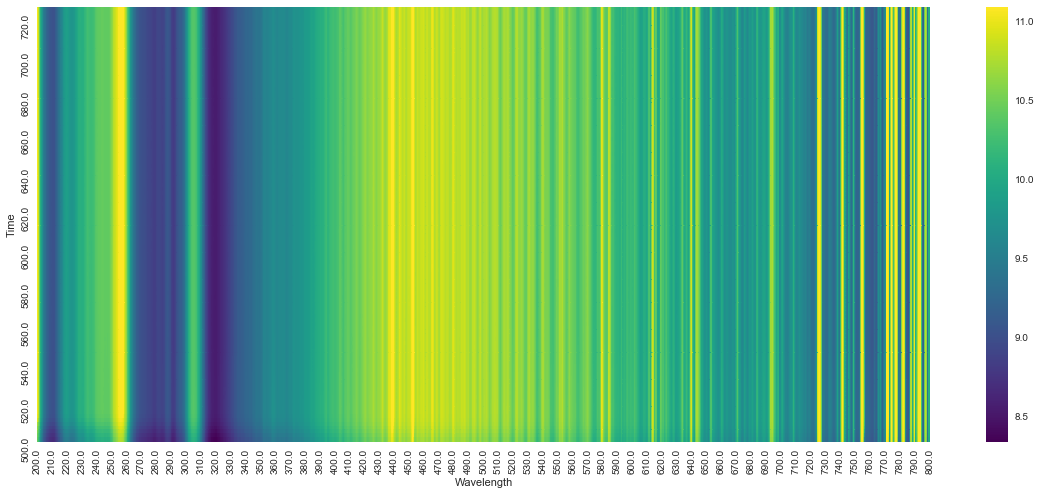

In [183]:
# let's zoom in on the overetch portion >500s.  this shows a bit more detail in the latter third of processing.

df_gt500 = data_df.ix[500:]                                                         #slice from 500s to last row
ax = sns.heatmap(log(df_gt500), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

### Having looked at the data file for shape and conventions used in the files, we now need to get all the training data from csv files 

In [184]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 

import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in glob.glob("Critical_KMONs/*DET*spectra_A_IMO*"):    #use glob to aggregate files/folders into our dict
    #perform the column indexing and transposing to get each df in correct format.
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    #Need to match the Label categorization for the lots#
    
    
    
    
    #End matching#
    
    dataLists[datafile] = df                                        #populate dict values with each csv file of interest
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict
'''

'\nneed to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs\nkey = string filename that includes the IMOxxxxxx identifier which will be used to match to \'Error\' value \nvalue = dataframe made up of the csv file data \n\nimport glob\nimport pprint\n\ndataLists = {}                                                      #initialize our dict to be filled w df\'s from csv files\n\nfor datafile in glob.glob("Critical_KMONs/*DET*spectra_A_IMO*"):    #use glob to aggregate files/folders into our dict\n    #perform the column indexing and transposing to get each df in correct format.\n    df = pd.read_csv(datafile)  \n    df.rename(columns ={\'Run Time\':\'Time\'}, inplace = True)\n    df = df.drop(\'Name\', 1)\n    df.set_index(\'Time\', inplace = True)\n    df.columns.name = \'Wavelength\'\n    \n    #Need to match the Label categorization for the lots#\n    \n    \n    \n    \n    #End matching#\n    \n    dataLists[datafile] = 

In [262]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 
'''
import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in sorted(glob.glob(r"\\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\*spectra_A_IMO*")):   #use glob to aggregate files/folders into our dict
    '''perform the column indexing and transposing to get each df in correct format.'''
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    '''Need to match the Label categorization for the lots'''
    
    
    
    
    '''End matching'''
    id = str(re.findall('(?<=_A_)[A-Z0-9]+', datafile))
    df = df.iloc[0:350]                                       #will need arrays of all same length so use only the first 350 rows
    dataLists[id] = df                                        #populate dict values with each raw csv file of interest
    #dataLists[id] = log(df)                                   #populate dict values with log value csv
    
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict

datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-03-14-33-19_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO294852.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-08-17-44-47_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO305019.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-13-44-05_DET7AEP01_PodB_CHA_KMON_Step0_spectra_A_IMO308131.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A_IMO308056.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-23-36-27_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO306885.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-13-46-51_DET7AEP02_PodB_CHA_KMON_Step0_spectra_A_IMO308310.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-20-31-

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,736,728,720,710,704,699,694,693,693,691,...,876,834,910,1307,1571,1416,956,879,1099,1090
4.0,917,890,864,839,820,803,795,788,782,776,...,1259,1142,1347,2415,3135,2717,1463,1278,1861,1828
6.0,1045,1003,965,928,898,877,860,847,838,830,...,1262,1148,1358,2390,3081,2674,1462,1281,1844,1812
8.0,1053,1010,970,931,902,880,862,849,839,830,...,1251,1142,1342,2346,3019,2625,1451,1269,1810,1778
10.0,1052,1008,967,930,905,878,860,849,838,828,...,1249,1143,1334,2325,2993,2607,1448,1264,1791,1763


In [263]:
#we can see the number of data points available that have spectra <- not all of these will have an 'Error' value but all 
#runs with an 'Error' should be found.  Verify later in code.
print (len(dataLists))

170


In [264]:
'''debug cell - confirm a selected dict value for correctness'''

d = dict((k, v) for k, v in dataLists.items() if '307365' in k)
for i in d:
    dfcheck = d[i]
dfcheck.head()


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,754,742,735,726,716,709,707,706,703,700,...,873,829,902,1283,1561,1426,964,876,1086,1086
4.0,959,928,899,870,846,832,818,809,804,799,...,1234,1118,1310,2307,3033,2673,1456,1249,1800,1792
6.0,1073,1029,988,951,920,893,878,864,853,845,...,1237,1125,1311,2275,2973,2628,1459,1248,1771,1767
8.0,1073,1030,986,945,911,888,872,862,852,843,...,1220,1115,1296,2229,2905,2569,1436,1236,1743,1734
10.0,1074,1030,986,949,916,892,874,860,851,842,...,1215,1112,1290,2193,2861,2540,1424,1226,1723,1716


### The above sequence of code has loaded all of the datasets into a dictionary of dataframes that each represents a run of data that will be labeled according to the corresponding Error for that lot.

In [265]:
'''#pull in the files containing Error data which will be used to define anomylous vs. non-anom '''

raw_Errors = pd.read_csv('7AToy_Shared_WorkingFile.csv')
raw_Errors.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,7A,1,307311,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
1,7A,2,302809,3524,NaN,800,30,1.5,10.0,0,1,1,1,1,NaN,NaN
2,7A,3,307366,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
3,7A,4,306917,3524,NaN,800,30,1.5,10.0,0,1,1,1,1,NaN,NaN
4,7A,5,307141,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN


In [266]:
raw_Errors.Error.dropna().describe()

count    144.000000
mean       0.177785
std        0.730176
min       -3.522000
25%       -0.284500
50%        0.185500
75%        0.638500
max        2.005000
Name: Error, dtype: float64

### 'raw_Errors' dataframe has a target column called 'Error' which is being used to demark which points are defined as anomylous vs non-anom.  The absolute value of distance to zero is the metric I will used here.  I will use a 2sigma cutoff to assign 

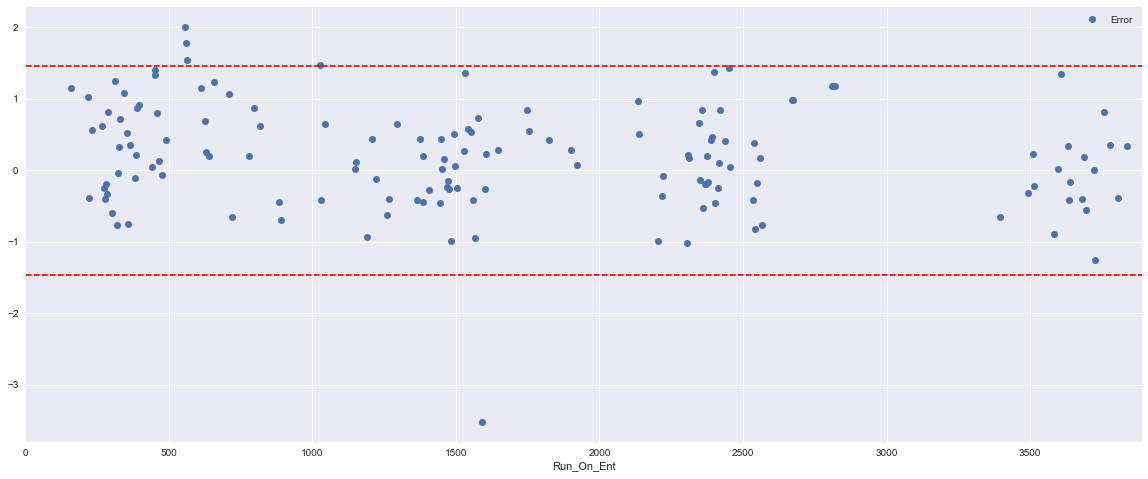

In [267]:
'''scatterplot with 2s cutoff lines shown'''

cutoff = 2 * raw_Errors.Error.std()
raw_Errors.plot(x = 'Run_On_Ent', y = 'Error', style = 'o')
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')

In [268]:
'''
Cell creates a new dataframe with the data pts labeled as anomylous = 1, non-anom = 0
'''
raw_Errors2 = raw_Errors.set_index('Run_On_Ent').dropna()                  #reset index to run order
clas_Errors = raw_Errors2[['Entity','Lot','Error']].copy()                 #copy columns needed for analysis to new df
clas_Errors["Label"] = np.where(abs(clas_Errors['Error']) > cutoff, 1, 0)  #classify pt as anom or non-anom
                              
clas_Errors.set_index('Lot', inplace = True)
clas_Errors.loc[clas_Errors['Label'] == 1]                                 #show anomylous rows ('Label' = 1)

,Entity,Error,Label
Lot,,,
308055A,7A,2.005,1
308501,7A,1.782,1
306641A,7A,1.537,1
310357,7A,1.465,1
310369,7A,-3.522,1


### we can see there will be 5 anomalous pts in our training set

In [269]:
print (type(clas_Errors)) 

<class 'pandas.core.frame.DataFrame'>


In [270]:
print (type(dataLists)) 

<class 'dict'>


In [271]:
dataLists2 = {}
matchcounter = 0
missingcounter = 0
for k in dataLists:
    #print ('k=',k)
    id = re.findall('(?<=IMO)[A-Z0-9]+', k)[0]
    #print('id=',id)
    ndf = clas_Errors[clas_Errors.index == id]
    #print (len(ndf))
    if len(ndf) > 0:
        category = (ndf.iloc[-1]['Label'])
        dataLists2[k] = (category, dataLists[k])
        matchcounter +=1
        #print(dataLists2[k])
    else: 
        '''Lot not in dataLists'''
        #dataLists2[k] = (None, dataLists[k])  --> don't keep non-matching data
        missingcounter += 1
        continue
print ('missing', missingcounter)
print ('match', matchcounter)
#dataLists2

missing 46
match 124


In [272]:
len(dataLists2) #only 124 matches of spectra and error data

124

In [273]:
y = {} # our labels
X = {} # our spectra data
for k,(label, spectra) in dataLists2.items():
    y[k] = label
    X[k] = spectra
    last = k
print ('last key', k)
X[k].head()

last key ['IMO318134A']


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,739,732,723,713,704,700,697,694,693,692,...,864,825,899,1272,1530,1388,945,874,1079,1072
4.0,945,914,886,858,834,819,806,797,791,786,...,1236,1126,1317,2321,3016,2634,1439,1246,1796,1776
6.0,1059,1016,977,940,904,886,869,856,844,835,...,1240,1132,1322,2293,2963,2594,1441,1249,1778,1755
8.0,1062,1022,982,940,911,887,866,855,845,835,...,1228,1119,1303,2246,2900,2543,1421,1239,1749,1722
10.0,1064,1022,979,940,909,884,865,852,843,835,...,1221,1121,1294,2218,2862,2515,1417,1229,1733,1708


### unpack the dictionary tuples to make numpy arrays of the values for labels and spectra and prep the data formats into ndarrays suitable for sklearn modules.

In [295]:
y = [] # our labels
X = [] # our spectra data

for k,(label, spectra) in dataLists2.items():
    y.append(label)
    X.append(spectra.values)
#    if spectra.shape[0] < minim: minim = spectra.shape[0]
    last = k
    
    
#print('minum')

y = (numpy.array(y))  
X = (numpy.array(X))       #give me a 3-D array (124,350,1201)
print('X shape:', X.shape)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 42350
nsamples,nx,ny = X.shape
d2_X = X.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X.shape)
print('labels y shape:', len(y))
print('X shape:', X.shape)
#print('last spectra array \n',X[-1])

X shape: (124, 350, 1201)
reshaped d2_X: (124, 420350)
labels y shape: 124
X shape: (124, 350, 1201)
last spectra array 
 [  739   732   723 ..., 11874 22900 22077]


In [275]:
#attempt metric learn w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::2]
nsamples,nx,ny = X_e2c.shape
d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

reshaped d2_X: (124, 210175)
labels y shape: 124


In [276]:
### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_R_anom = []
x_R_good = []
for k,(label, spectra) in dataLists2.items():
    if label == 1:
        y_R_anom.append(spectra.values)
    else: 
        x_R_good.append(spectra.values)

#Create flattened numpy arrays for R that have samples as columns and features as rows
y_R_anom = (numpy.array(y_R_anom))  
nsamples,nx,ny = y_R_anom.shape
d2_y_R_anom = y_R_anom.reshape((nsamples,nx*ny)).T

x_R_good = (numpy.array(x_R_good))
nsamples,nx,ny = x_R_good.shape
d2_x_R_good = x_R_good.reshape((nsamples,nx*ny)).T

print (d2_y_R_anom.shape)
print (d2_x_R_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_anom.csv', d2_y_R_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_good.csv', d2_x_R_good, fmt='%d', delimiter=',')

(420350, 4)
(420350, 120)


In [277]:
### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_Re2c_anom = []
x_Re2c_good = []

#Create flattened numpy arrays for R that have samples using EVERY OTHER COLUMN and features as rows
y_Re2c_anom = y_R_anom[:,::2]  
nsamples,nx,ny = y_Re2c_anom.shape
d2_y_Re2c_anom = y_Re2c_anom.reshape((nsamples,nx*ny)).T

x_Re2c_good = x_R_good[:,::2]
nsamples,nx,ny = x_Re2c_good.shape
d2_x_Re2c_good = x_Re2c_good.reshape((nsamples,nx*ny)).T

print (d2_y_Re2c_anom.shape)
print (d2_x_Re2c_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_e2c_anom.csv', d2_y_Re2c_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_e2c_good.csv', d2_x_Re2c_good, fmt='%d', delimiter=',')

(210175, 4)
(210175, 120)


### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_Rfilt_anom = []
x_Rfilt_good = []

#Create flattened numpy arrays for R that have samples using EVERY OTHER COLUMN and features as rows
#y_Re2c_anom = y_R_anom[:,::2]  




nsamples,nx,ny = y_Re2c_anom.shape
d2_y_Re2c_anom = y_Re2c_anom.reshape((nsamples,nx*ny)).T

x_Re2c_good = x_R_good[:,::2]
nsamples,nx,ny = x_Re2c_good.shape
d2_x_Re2c_good = x_Re2c_good.reshape((nsamples,nx*ny)).T

print (d2_y_Re2c_anom.shape)
print (d2_x_Re2c_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_e2c_anom.csv', d2_y_Re2c_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_e2c_good.csv', d2_x_Re2c_good, fmt='%d', delimiter=',')

In [278]:
d2_y_R_anom

array([[  753,   755,   752,   752],
       [  744,   745,   742,   743],
       [  734,   736,   732,   733],
       ..., 
       [11498, 11510, 11566, 11394],
       [22358, 22391, 22506, 21845],
       [21918, 21987, 22101, 21482]], dtype=int64)

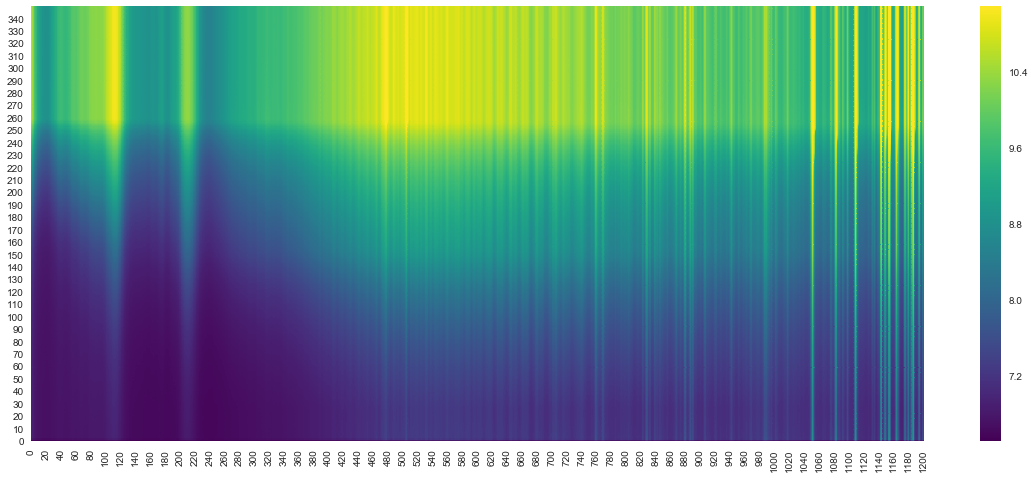

In [279]:
#spot check plot of the last spectra array element showing that the data indeed appears intact & correct
some_spectra_image = X[-1]
ax = sns.heatmap(log(some_spectra_image), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()          

In [280]:
#calculate and plot std over each column in the spectra_image
print('X shape:', X.shape)
print (type(X))
X_var = {}
#print (X[-1].size)
#for image in X: #(label, spectra) in  X:
    #print (image.size)
    #X_var = np.var(X[image])
#std_df = numpy.std(X_concat, axis = 0)
#ax = plot(std_df)
#plt.xlim((0,1200))
i = 0
for spectra in X:
    X_var[i] = numpy.var(spectra, axis = 0)
    i+=1
print (X_var)
#X_meanvar = numpy.mean(X_var, axis = 0)
#ax = plot(X_meanvar)

X shape: (124, 350, 1201)
<class 'numpy.ndarray'>
{0: array([  7.51892010e+08,   7.19612036e+08,   5.17136423e+08, ...,
         1.88269957e+07,   7.63159540e+07,   7.25463070e+07]), 1: array([  8.11544184e+08,   7.42058791e+08,   5.05445412e+08, ...,
         2.02976179e+07,   8.24639438e+07,   7.84438847e+07]), 2: array([  7.74606515e+08,   7.04181223e+08,   4.77246236e+08, ...,
         1.95699999e+07,   7.90841730e+07,   7.49774408e+07]), 3: array([  8.03265534e+08,   7.40370790e+08,   5.08577775e+08, ...,
         2.02143657e+07,   8.15826930e+07,   7.76475610e+07]), 4: array([  7.57112244e+08,   7.06449100e+08,   4.93124348e+08, ...,
         1.88874386e+07,   7.54673362e+07,   7.17449896e+07]), 5: array([  7.60057108e+08,   7.14224559e+08,   5.02352283e+08, ...,
         1.87874288e+07,   7.47633747e+07,   7.11301299e+07]), 6: array([  7.91729978e+08,   7.43940289e+08,   5.22739831e+08, ...,
         1.95284814e+07,   7.79964741e+07,   7.49116247e+07]), 7: array([  7.40780404e+0

In [281]:
print 

<function print>

(1201,)


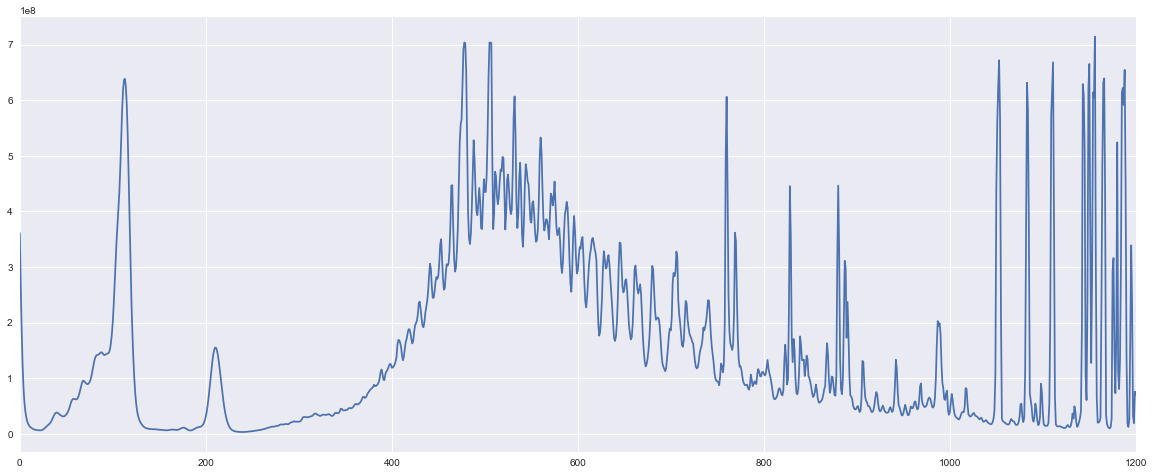

In [282]:
#calculate and plot std over each column in the spectra_image
var_df = numpy.var(some_spectra_image, axis = 0)
ax = plot(var_df)
plt.xlim((0,1200))
print (var_df.shape)

In [283]:
len(X)

124

(0, 1200)

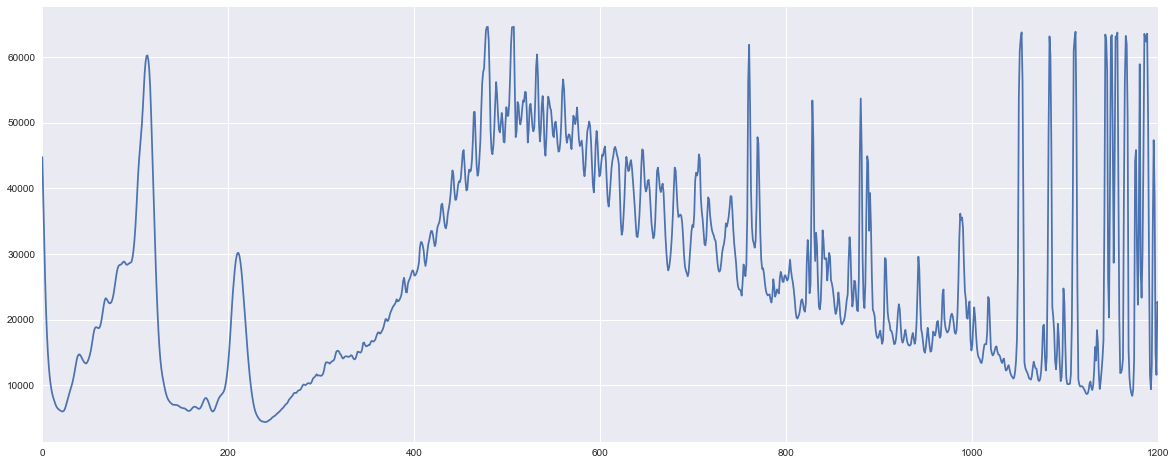

In [284]:
#calculate and plot std over each column in the spectra_image
range_df = numpy.ptp(some_spectra_image, axis = 0)
ax = plot(range_df)
plt.xlim((0,1200))

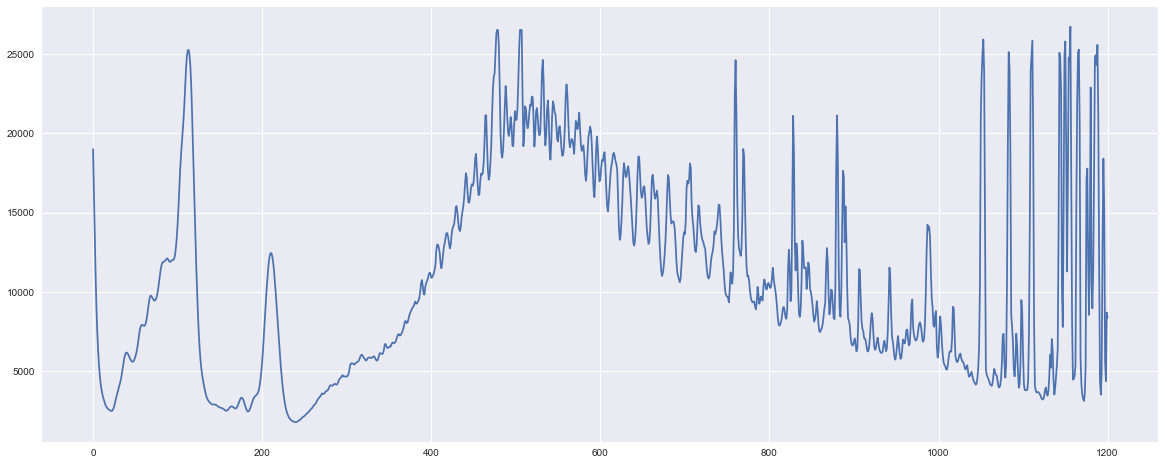

In [285]:
#calculate and plot std over each column in the spectra_image
std_df = numpy.std(some_spectra_image, axis = 0)
ax = plot(std_df)

### Now we can attempt to use the data for training

### too many features and the LMNN fails for memory.  our full set 420k+ features when flattened!!! 50 features takes seconds, 500 features takes 5-10minutes

In [286]:
from metric_learn import LMNN
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn.fit(d2_X, y)
X_lmnn = lmnn.transform()
print('lmnn metric shape:', lmnn.metric().shape)
lmnn.metric()

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\metric_learn-0.4.0-py3.6.egg\metric_learn\lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation
  warnings.warn('use_pca does nothing for the python_LMNN implementation')


MemoryError: 

In [ ]:
#attempt metric learn w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::2]
nsamples,nx,ny = X_e2c.shape
d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

### Laptop requires shrinking dataset past every 8th column at least, need to attempt on bigger machine 

In [ ]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn.fit(d2_X_e2c, y)
X_lmnn = lmnn.transform()
print('lmnn metric shape:', lmnn.metric().shape)
lmnn.metric()

### PCA w sklearn MinMaxScaler()

# not sure if minmaxscaler is correct in this instance since each wavelenght should have the same scale and not treated as independant labels for each column ??? - confirm w Praneeth

In [287]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#use this code snip to preprocess data using minmax scalar
min_max_scaler = preprocessing.MinMaxScaler()
d2_X_minmax = min_max_scaler.fit_transform(d2_X)

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
#pca.fit(d2_X)     #this line will run on the flattened d2_X
pca.fit(d2_X_minmax)  #this line will run on scaled d2_X_minmax
#cumsum = np.cumsum(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1)

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


The minimum number of dimensions to retain 95% variance =  11
[ 49.57  65.55  76.95  83.63  87.8   90.46  91.99  93.03  93.88  94.67
  95.32  95.78  96.12  96.42  96.7   96.94  97.14  97.32  97.49  97.65
  97.79  97.92  98.04  98.15  98.25  98.35  98.44  98.52  98.59  98.65
  98.71  98.76  98.81  98.85  98.89  98.92  98.95  98.98  99.01  99.04
  99.06  99.08  99.1   99.12  99.14  99.16  99.18  99.2   99.22  99.24
  99.26  99.28  99.29  99.3   99.31  99.32  99.33  99.34  99.35  99.36
  99.37  99.38  99.39  99.4   99.41  99.42  99.43  99.44  99.45  99.46
  99.47  99.48  99.49  99.5   99.51  99.52  99.53  99.54  99.55  99.56
  99.57  99.58  99.59  99.6   99.61  99.62  99.63  99.64  99.65  99.66
  99.67  99.68  99.69  99.7   99.71  99.72  99.73  99.74  99.75  99.76
  99.77  99.78  99.79  99.8   99.81  99.82  99.83  99.84  99.85  99.86
  99.87  99.88  99.89  99.9   99.91  99.92  99.93  99.94  99.95  99.96
  99.97  99.98  99.99  99.99]


(0, 15)

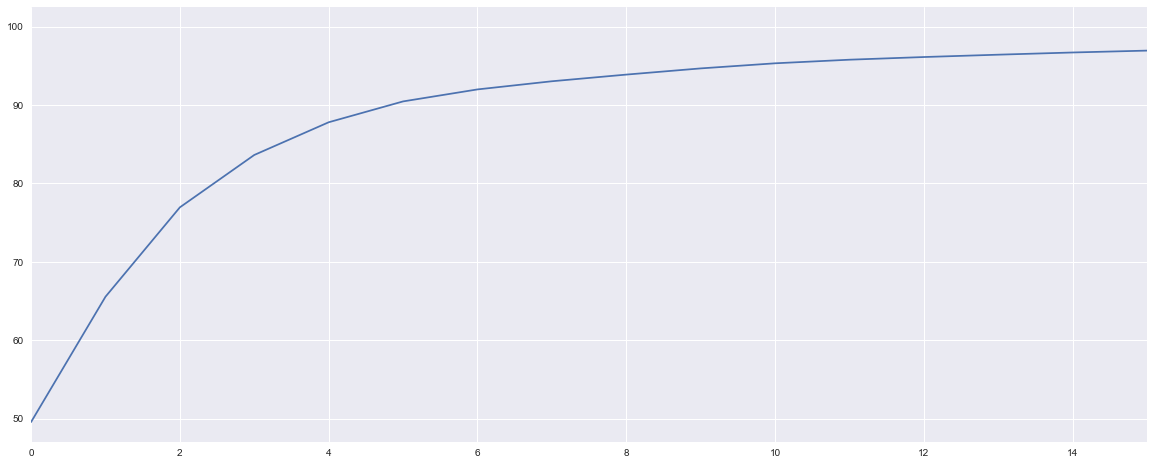

In [289]:
# Let's plot the explained variance vs dimensions
plt.plot(var1)
plt.xlim([0,15])
#note the dimensions start at 0, so 95% is +1

In [297]:
# we will run PCA formatted to retain 90% of variance by inserting value between 0-1.  
# this will get us to 3D in this short example.
pca = PCA(n_components = 0.90)
X_reduced = pca.fit_transform(d2_X_minmax)
print (X_reduced.shape)
print (X_reduced)

(124, 6)
[[  8.02608288e+01   8.97360309e+01   8.03142556e+00  -3.99827173e+01
   -3.92983754e+01   3.85349621e+01]
 [ -2.00959081e+02   3.56367359e+01  -8.49383089e+01  -2.77595058e+01
   -7.41852787e+00   5.02835761e+01]
 [ -1.67537560e+01   6.39613962e+01  -1.66759727e+01  -4.64645389e+01
   -1.03295666e+01   4.09785455e+01]
 [ -1.52049457e+02   4.17505739e+01  -7.41469752e+01  -4.93933140e+01
   -4.86207261e+00   4.69935648e+01]
 [  3.98568625e+01   8.23679369e+01  -4.51380327e+00  -6.15332026e+01
    1.03036639e+01   1.78203695e+01]
 [  1.93079312e+01   8.36153061e+01  -3.51232588e+00  -5.34891513e+01
    1.09906427e+01   2.67077740e+01]
 [ -1.14704847e+02   6.63050504e+01  -4.04182320e+01  -3.51647061e+01
    9.33112788e+00   2.88653131e+01]
 [  1.07258651e+02   9.41835847e+01   1.07257925e+01  -6.14298911e+01
    8.86574158e+00  -1.12502457e+00]
 [ -1.18051747e+02   6.85289036e+01  -3.20570654e+01  -3.61008760e+01
    8.20127465e+00   2.55965969e+01]
 [ -4.29264368e+01   7.30389

In [290]:
print ('labels: \n', y)

labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


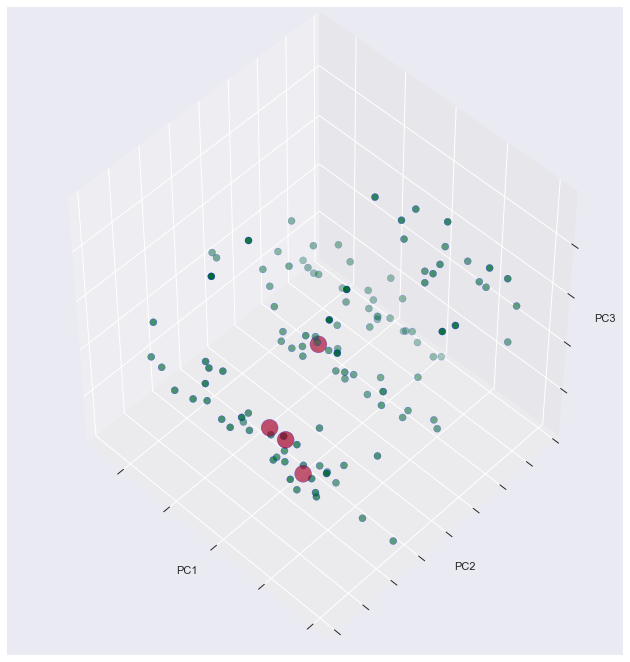

In [351]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
z = np.choose(y, [1,0])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=z, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
    

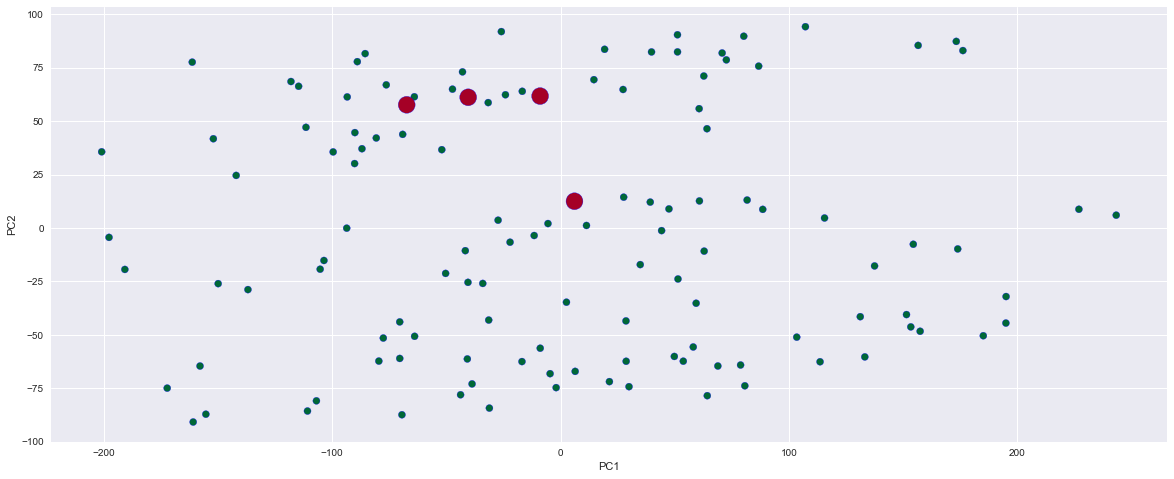

In [340]:
plt.figure()

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('PC1')
plt.ylabel('PC2')

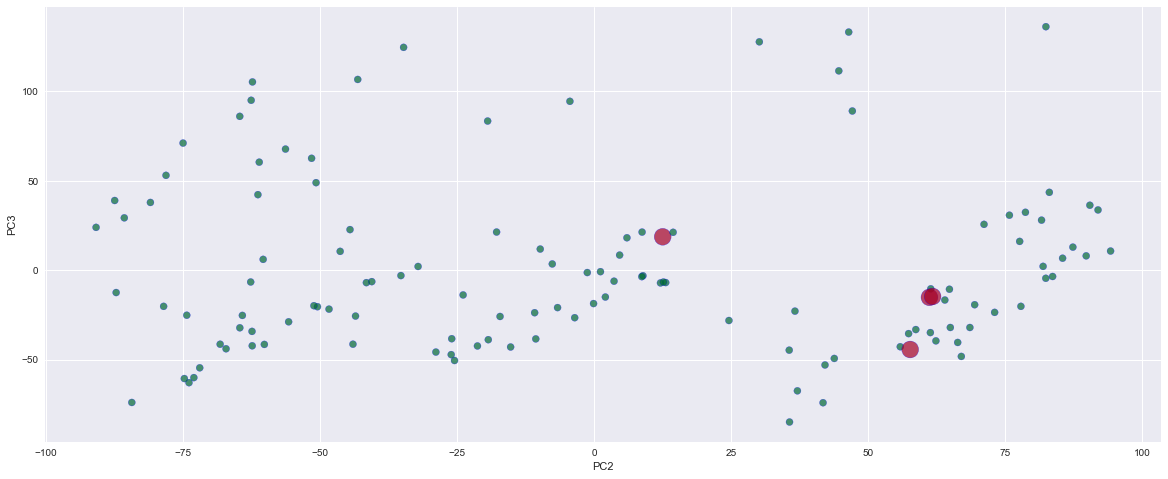

In [341]:
plt.figure()
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area, alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')

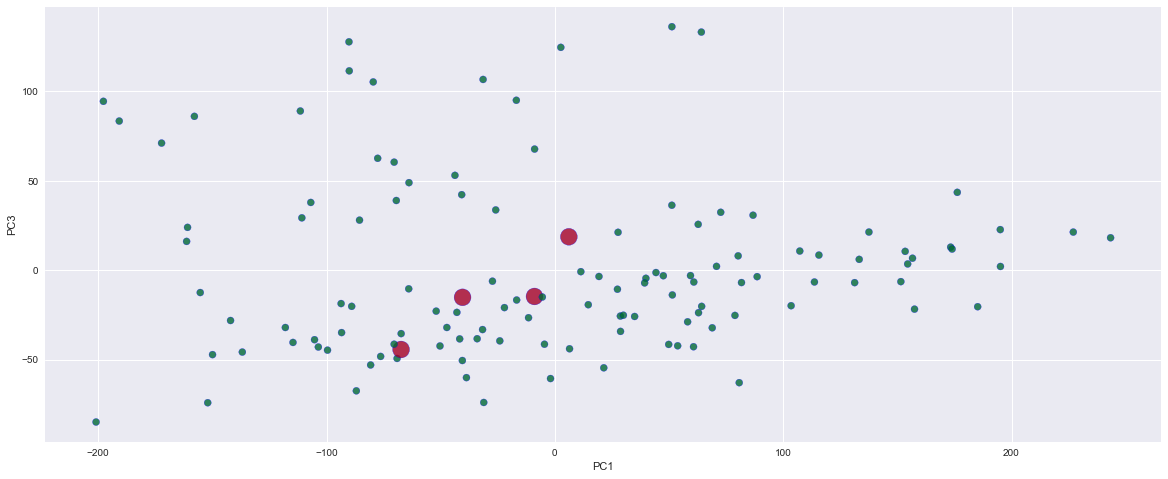

In [342]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', alpha = 0.8, s = area)
plt.xlabel('PC1')
plt.ylabel('PC3')

### PCA w log(df) values as the feature scaler

In [353]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#use this code snip to preprocess data using minmax scalar
#min_max_scaler = preprocessing.MinMaxScaler()
#d2_X_minmax = min_max_scaler.fit_transform(d2_X)

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
pca.fit(log(d2_X))     #this line will run on the flattened d2_X
#pca.fit(d2_X_minmax)  #this line will run on scaled d2_X_minmax
#cumsum = np.cumsum(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1)

The minimum number of dimensions to retain 95% variance =  4
[ 80.06  87.89  93.21  95.19  96.56  97.33  97.88  98.18  98.45  98.65
  98.84  98.97  99.08  99.18  99.27  99.34  99.4   99.45  99.5   99.54
  99.57  99.6   99.63  99.66  99.68  99.7   99.72  99.74  99.76  99.78
  99.79  99.8   99.81  99.82  99.83  99.84  99.85  99.86  99.87  99.88
  99.89  99.9   99.91  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92]


(0, 15)

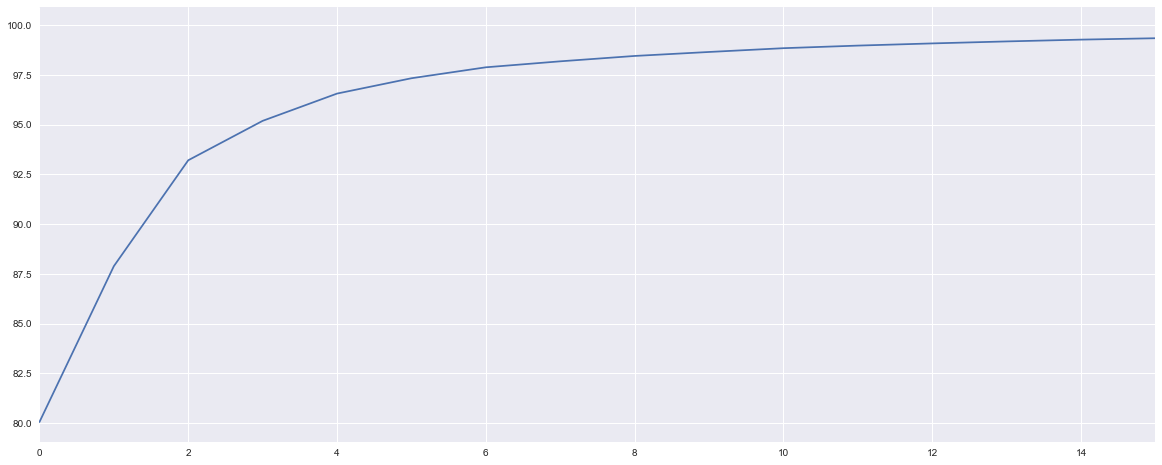

In [354]:
# Let's plot the explained variance vs dimensions
plt.plot(var1)
plt.xlim([0,15])
#note the dimensions start at 0, so 95% is +1

In [358]:
# we will run PCA formatted to retain 90% of variance by inserting value between 0-1.  
# this will get us to 3D in this short example.
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(log(d2_X))   # using log transform of data
print (X_reduced.shape)
print (X_reduced)

(124, 4)
[[  3.48591299e+01  -1.51197043e+01   5.59040951e+00   1.50018355e-02]
 [ -6.23368865e+01  -1.61250817e+01  -2.82848872e+00   9.72401324e+00]
 [ -1.28485870e+00  -1.38060115e+01   2.94795957e+00  -6.12975638e+00]
 [ -4.78939359e+01  -1.54087835e+01  -3.21924193e+00   4.33619911e+00]
 [  2.35390954e+01  -1.34318480e+01   3.98893909e+00  -1.49335214e+00]
 [  1.80253133e+01  -1.33026304e+01   5.06068914e+00  -2.02704541e+00]
 [ -2.99843074e+01  -1.41959780e+01   1.29962192e+00  -1.02913840e+00]
 [  4.71275488e+01  -1.31129839e+01   5.01720183e+00   5.54098866e+00]
 [ -2.87619522e+01  -1.40764752e+01   2.88615334e+00  -1.67639480e+00]
 [ -6.62743340e+00  -1.41745522e+01   1.17578964e+00  -5.02330275e+00]
 [  5.92121188e+01  -1.23826287e+01   3.30489511e+00   9.30914473e+00]
 [ -1.73521477e+01  -1.44572456e+01   3.79728339e+00  -4.36531557e+00]
 [  1.00374465e+01  -1.38314094e+01   1.46837235e+00  -5.54124882e+00]
 [ -1.95768143e+01  -1.40502026e+01  -4.83033410e-01  -2.94331662e+0

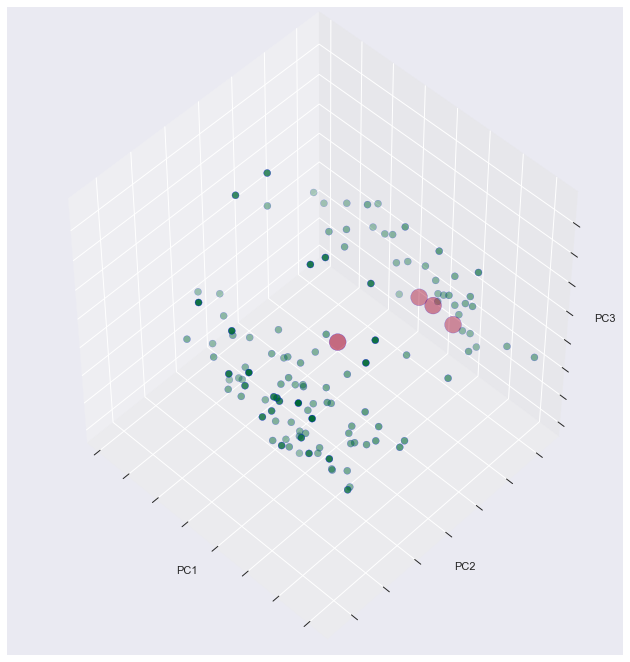

In [359]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
z = np.choose(y, [1,0])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=z, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
    

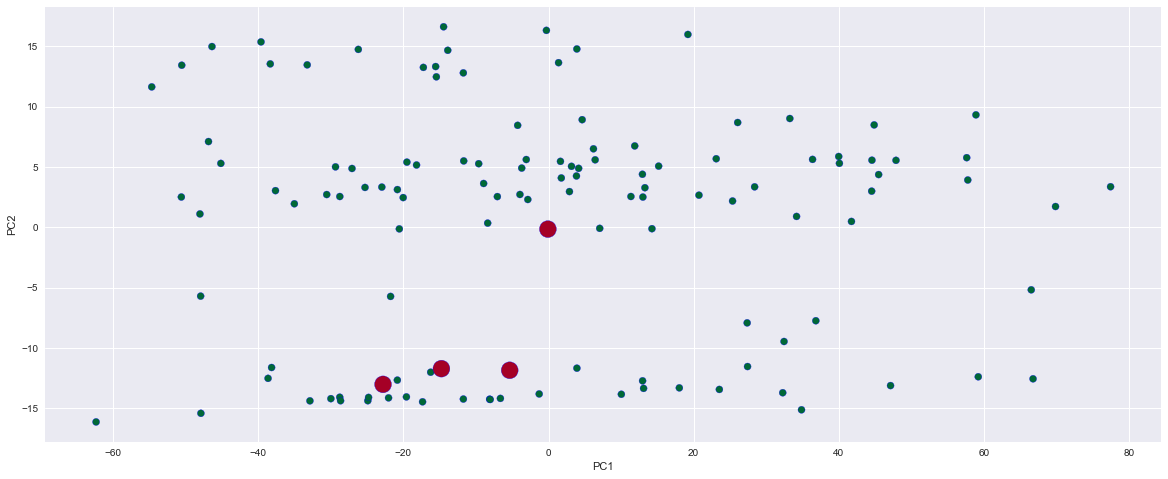

In [360]:
plt.figure()

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('PC1')
plt.ylabel('PC2')

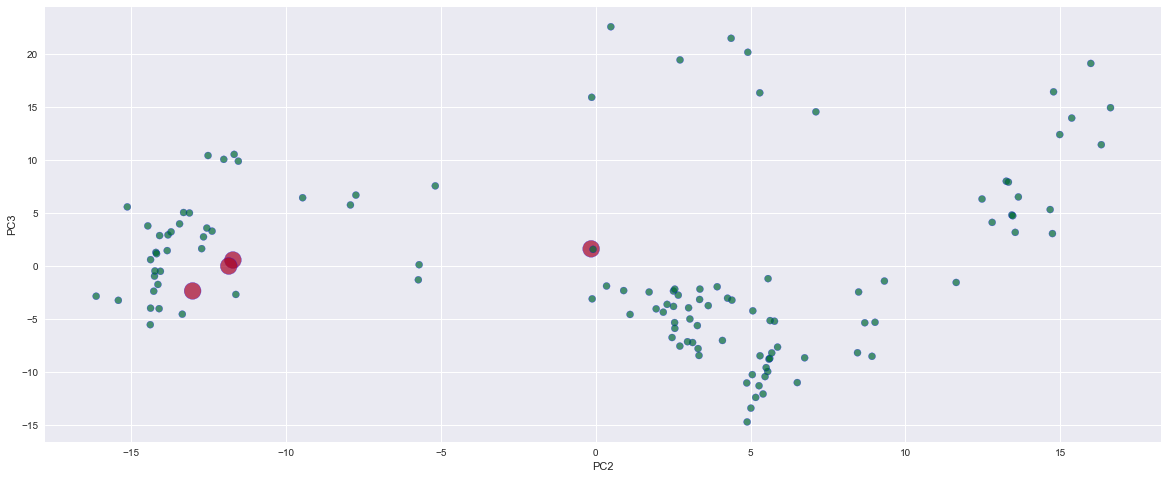

In [361]:
plt.figure()
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area, alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')

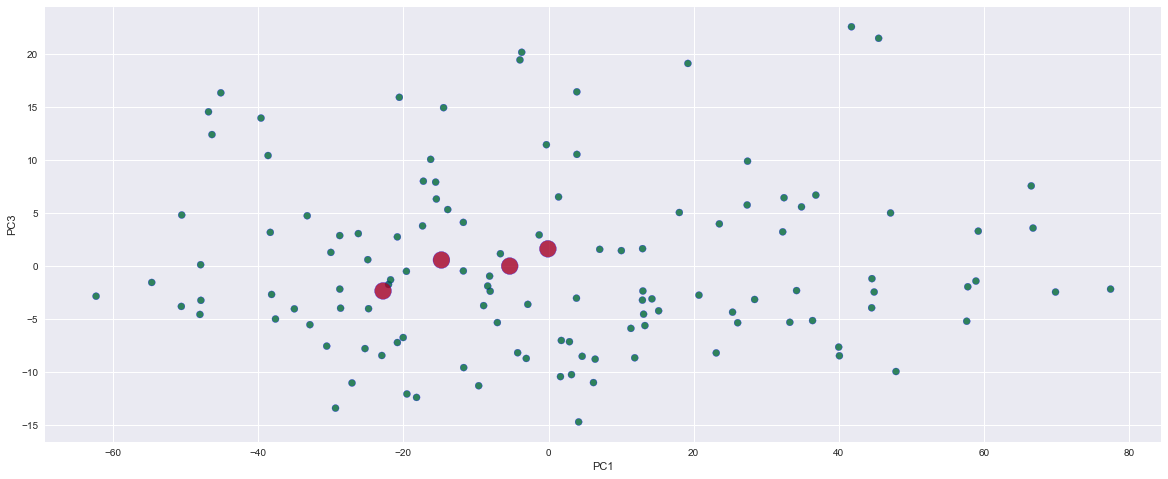

In [362]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', alpha = 0.8, s = area)
plt.xlabel('PC1')
plt.ylabel('PC3')

In [ ]:
#idea to throw in some other recipes that use different parameters and label those as anomylous and compare directly to all
#the KMONs.  this would simplify the problem since it is not proved that KMON can predict 'Error' w small datasets.  This would
#make it a more typical classification algorithm